Importing all the libaries need to conduct my EDA.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

This next section will cover my EDA (Exploratory Data Analysis).

In [2]:
# importing data
dataset = pd.read_csv("GBPUSD_D1_2024_25 - GBPUSD_D1.csv")
print(dataset)

           Date     Open     High      Low    Close  Volume  Spread
0    2024-01-01  1.27184  1.27347  1.27155  1.27274    3288     147
1    2024-01-02  1.27275  1.27596  1.26105  1.26220  133451      11
2    2024-01-03  1.26221  1.26761  1.26156  1.26727  149803      12
3    2024-01-04  1.26727  1.27296  1.26565  1.26807  126681      10
4    2024-01-05  1.26807  1.27707  1.26106  1.27173  158975      11
..          ...      ...      ...      ...      ...     ...     ...
357  2025-02-20  1.25829  1.26738  1.25800  1.26687  121232       8
358  2025-02-21  1.26691  1.26784  1.26246  1.26274  120645       9
359  2025-02-23  1.26260  1.26576  1.26260  1.26484    2497     200
360  2025-02-24  1.26483  1.26902  1.26117  1.26165  137942      10
361  2025-02-25  1.26166  1.26213  1.26164  1.26188    3466      10

[362 rows x 7 columns]


In [110]:
# looking at first 5 rows of data
dataset.head()

,Date,Open,High,Low,Close,Volume,Spread
0,2024-01-01,1.27184,1.27347,1.27155,1.27274,3288,147
1,2024-01-02,1.27275,1.27596,1.26105,1.26220,133451,11
2,2024-01-03,1.26221,1.26761,1.26156,1.26727,149803,12
3,2024-01-04,1.26727,1.27296,1.26565,1.26807,126681,10
4,2024-01-05,1.26807,1.27707,1.26106,1.27173,158975,11


In [111]:
# looking at last 5 rows of data
dataset.tail()

,Date,Open,High,Low,Close,Volume,Spread
357,2025-02-20,1.25829,1.26738,1.25800,1.26687,121232,8
358,2025-02-21,1.26691,1.26784,1.26246,1.26274,120645,9
359,2025-02-23,1.26260,1.26576,1.26260,1.26484,2497,200
360,2025-02-24,1.26483,1.26902,1.26117,1.26165,137942,10
361,2025-02-25,1.26166,1.26213,1.26164,1.26188,3466,10


In [112]:
# Shows number of rows, column names, data types, non-null values, index range, and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    362 non-null    object 
 1   Open    362 non-null    float64
 2   High    362 non-null    float64
 3   Low     362 non-null    float64
 4   Close   362 non-null    float64
 5   Volume  362 non-null    int64  
 6   Spread  362 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [113]:
# Checking for Duplication
print (len(dataset['Date']))
print(dataset['Date'].nunique())

362
362


In [114]:
# Missing Values Calculation
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Spread    0
dtype: int64

Conducting statistics summary.

In [115]:
# providing a summary of the data in a tranverse way
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,362,362,2024-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,362.0,NaN,NaN,NaN,1.273243,0.024245,1.21706,1.25879,1.269605,1.28579,1.3427
High,362.0,NaN,NaN,NaN,1.276817,0.024146,1.21761,1.262748,1.27275,1.287663,1.34341
Low,362.0,NaN,NaN,NaN,1.269723,0.024379,1.20992,1.256188,1.266525,1.283045,1.3367
Close,362.0,NaN,NaN,NaN,1.273299,0.024205,1.21583,1.258522,1.26982,1.285918,1.34267
Volume,362.0,NaN,NaN,NaN,95622.599448,60015.389738,1827.0,67712.5,94941.0,129607.75,516996.0
Spread,362.0,NaN,NaN,NaN,30.31768,55.684819,4.0,7.0,8.0,11.0,365.0


Univariate Analysis:

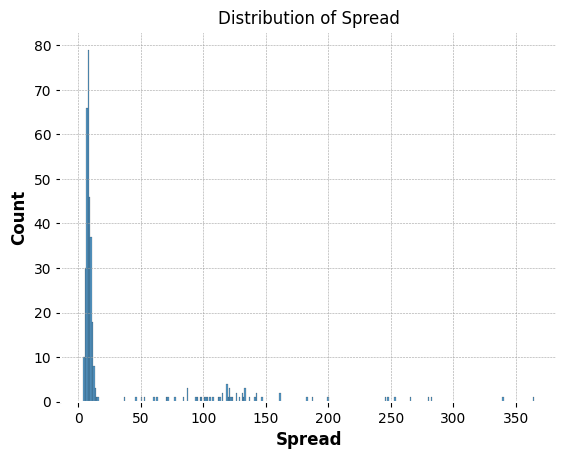

In [116]:
# Generating a Histogram
sns.histplot(data=dataset, x="Spread")
plt.title("Distribution of Spread")
plt.show()

Text(0.5, 1.0, 'Distribution of Volume')

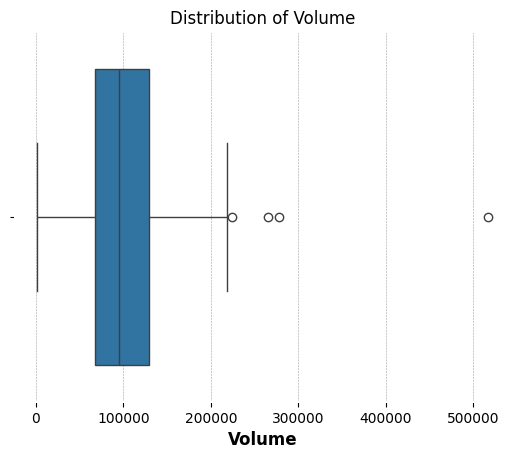

In [117]:
# creating a boxplot
sns.boxplot(x=dataset["Volume"])
plt.title("Distribution of Volume")

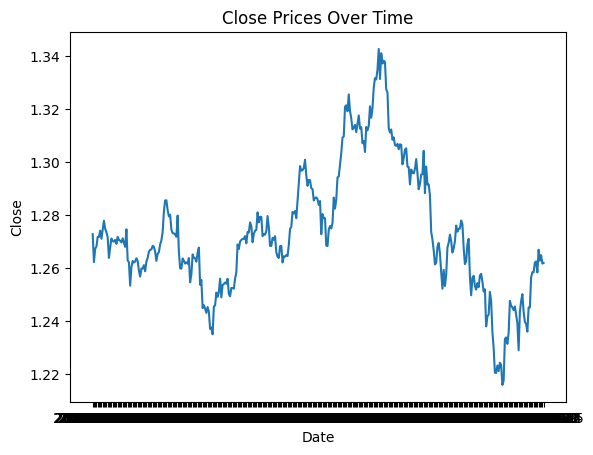

In [4]:
# providing a line plot
sns.lineplot(x="Date", y="Close", data=dataset) 
plt.title('Close Prices Over Time')
plt.show()

Bivariate Analysis:

Text(0.5, 1.0, 'Volume vs. Spread')

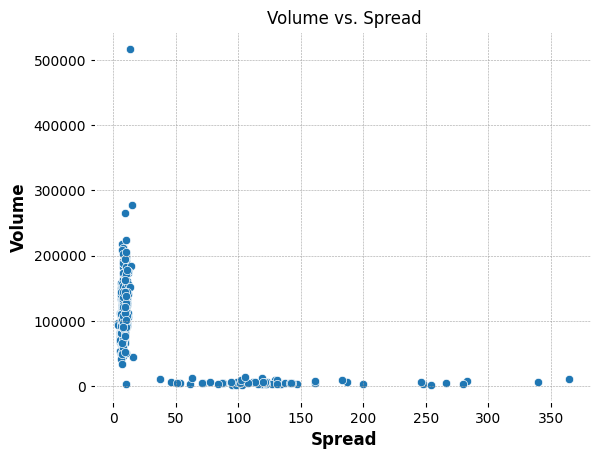

In [119]:
# creating a scatter plot chart
sns.scatterplot(data=dataset, x="Spread", y="Volume")
plt.title('Volume vs. Spread')

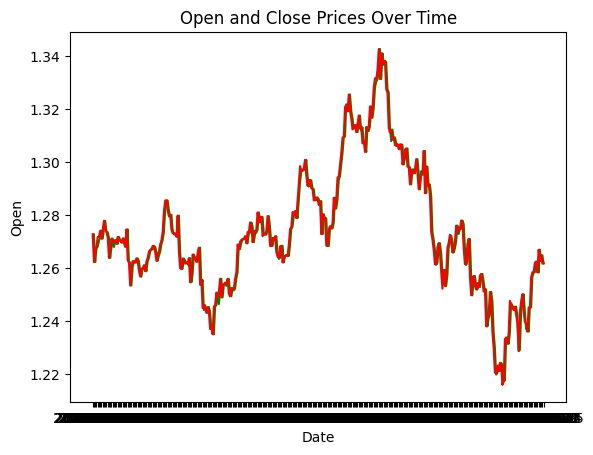

In [6]:
# providing a bivariate line plot
sns.lineplot(x="Date", y="Open", data=dataset, color='green') 
sns.lineplot(x="Date", y="Close", data=dataset, color='red') 
plt.title('Open and Close Prices Over Time')
plt.show()

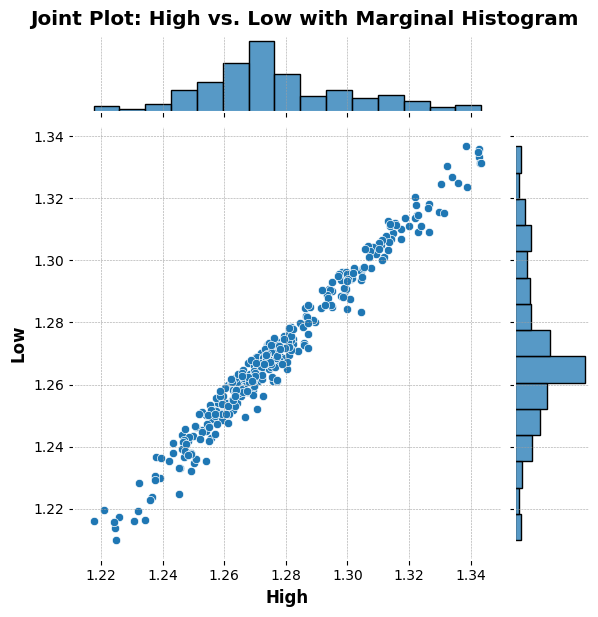

In [121]:
# Create the joint plot
sns.jointplot(x='High', y='Low', data=dataset, kind='scatter', marginal_kws=dict(bins=15, fill=True))

# Show the plot
plt.suptitle("Joint Plot: High vs. Low with Marginal Histogram", y=1.02)
plt.show()

Multivariate Graphs:

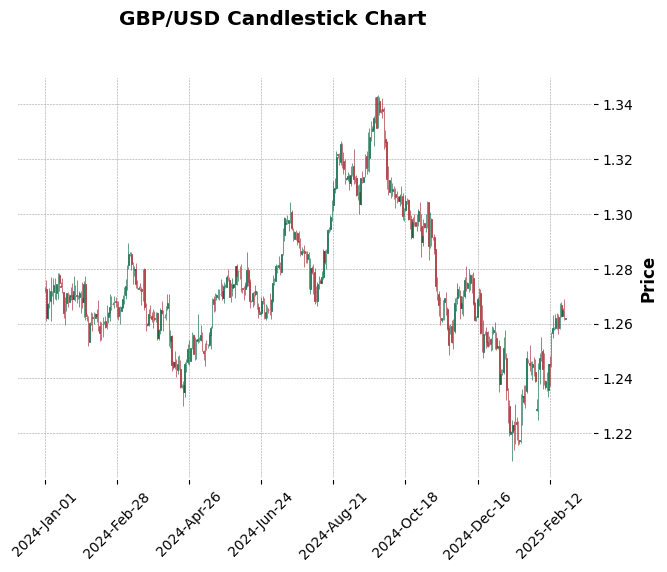

In [122]:
dataset_2 = dataset
dataset_2['Date'] = pd.to_datetime(dataset_2['Date'])
dataset_2.set_index('Date', inplace=True)


# Create the candlestick chart
mpf.plot(dataset_2, type='candle', style='charles', title='GBP/USD Candlestick Chart')


# Show the plot
plt.show()

In [7]:
print(dataset.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Spread'], dtype='object')


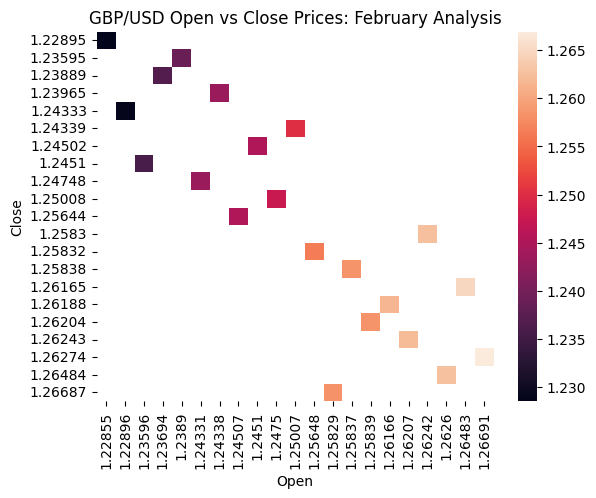

In [20]:
# Check if the 'Date' column contains the year 2025 and the month February
year_to_check = '2025-02'
contains_year = dataset['Date'].str.contains(year_to_check)

# Display the rows that contain the specified year
rows_with_year = dataset[contains_year]


# loading heatmap
sns.heatmap(rows_with_year.pivot(index="Close", columns="Open", values="Open"))
plt.title('GBP/USD Open vs Close Prices: February Analysis')
plt.show()

Future price predictions (Machine Learning)

Mean Squared Error: 5.573089737168648e-06


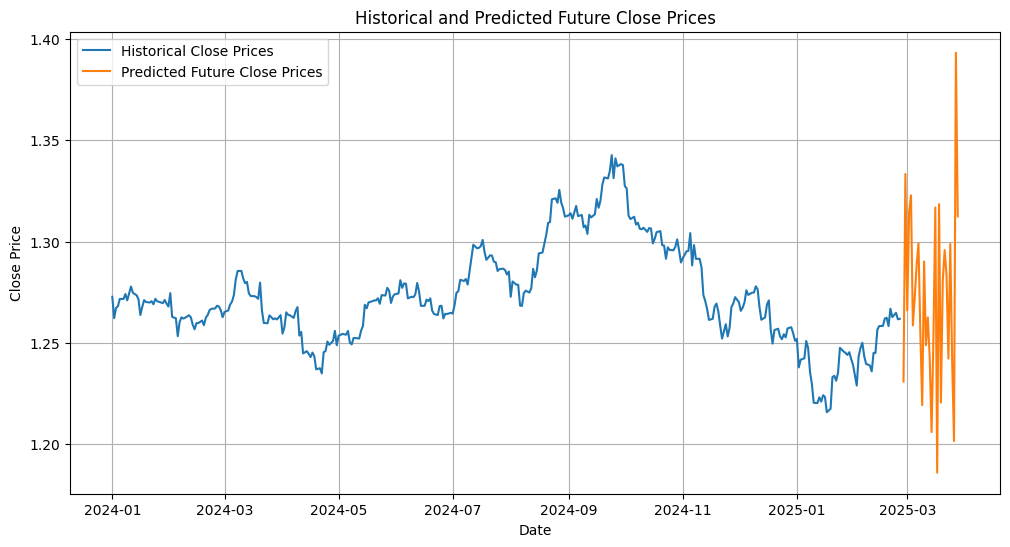

In [67]:
# Features and target
features = dataset[['Open', 'High', 'Low', 'Volume', 'Spread']]
target = dataset['Close']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicting future prices
future_dates = pd.date_range(start='2025-02-27', periods=30, freq='D')
future_features = pd.DataFrame({
    'Open': np.random.uniform(low=dataset['Open'].min(), high=dataset['Open'].max(), size=(30,)),
    'High': np.random.uniform(low=dataset['High'].min(), high=dataset['High'].max(), size=(30,)),
    'Low': np.random.uniform(low=dataset['Low'].min(), high=dataset['Low'].max(), size=(30,)),
    'Volume': np.random.uniform(low=dataset['Volume'].min(), high=dataset['Volume'].max(), size=(30,)),
    'Spread': np.random.uniform(low=dataset['Spread'].min(), high=dataset['Spread'].max(), size=(30,))
}, index=future_dates)

future_predictions = model.predict(future_features)

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Close'], label='Historical Close Prices', color='#1f77b4')
plt.plot(future_dates, future_predictions, label='Predicted Future Close Prices', color='#ff7f0e')
plt.legend()
plt.title('Historical and Predicted Future Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()